In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('car data.csv')

In [4]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


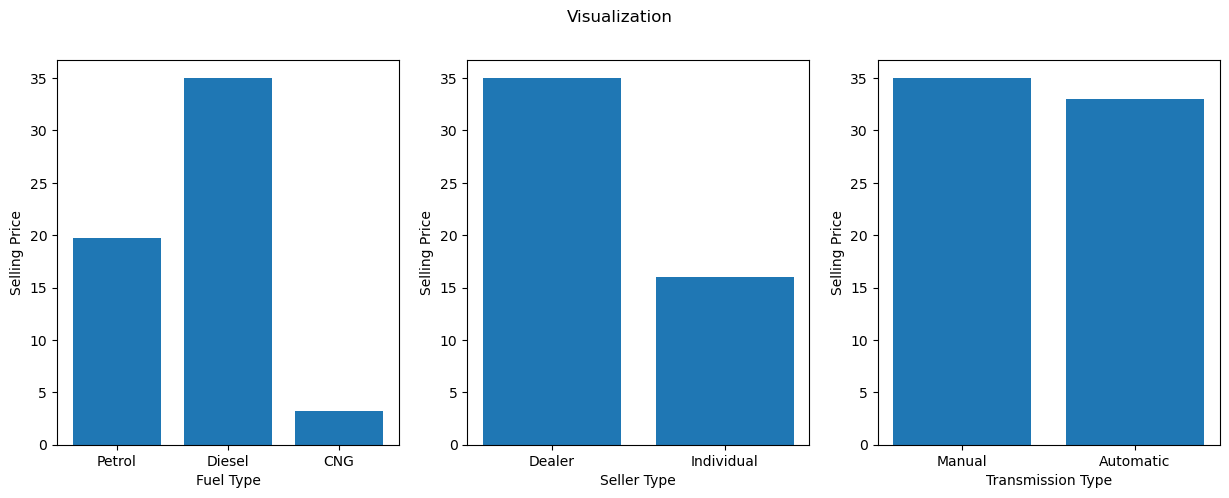

In [10]:
fig = plt.figure(figsize=(15,5))
fig.suptitle("Visualization")
plt.subplot(1,3,1)
plt.bar(data["Fuel_Type"],data["Selling_Price"])
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(data["Seller_Type"],data["Selling_Price"])
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,3)
plt.bar(data["Transmission"],data["Selling_Price"])
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

In [11]:
#manual encoding
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

In [12]:
#one hot encoding
data = pd.get_dummies(data, columns = ['Seller_Type','Transmission'], drop_first = True)

In [13]:
data.drop(columns=['Car_Name'], inplace=True)

In [14]:
data = data.astype(int)


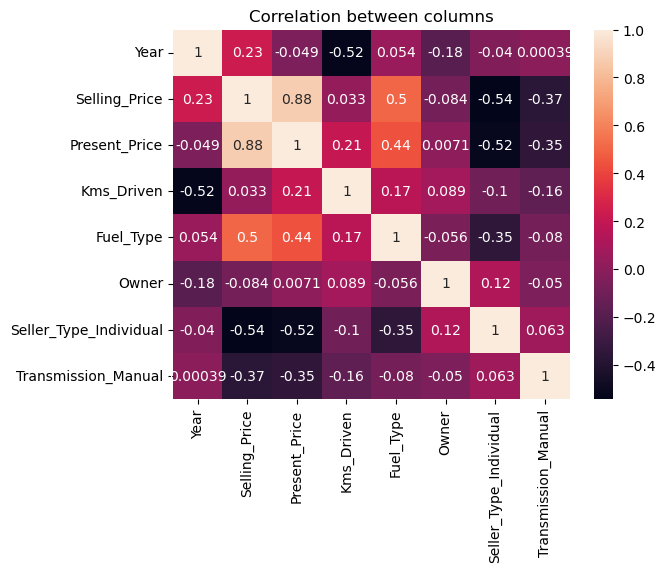

In [15]:
sns.heatmap(data.corr(),annot = True)
plt.title("Correlation between columns")
plt.show()

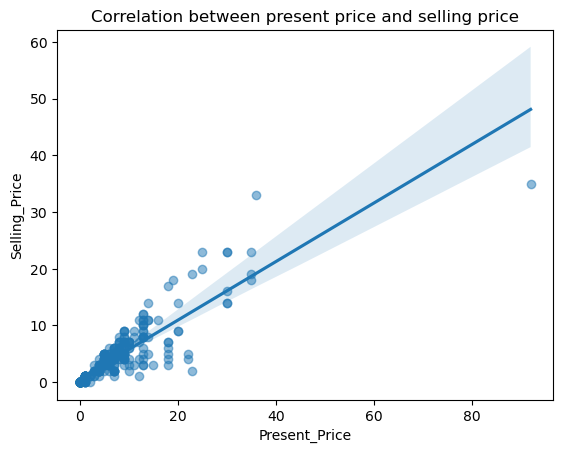

In [16]:
plt.title('Correlation between present price and selling price')
sns.regplot(x = "Present_Price", y = "Selling_Price", data = data, scatter_kws={'alpha': 0.5})
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [18]:
X = data.drop(["Selling_Price"],axis = 1)
y = data['Selling_Price']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)

In [25]:
pred

array([ 2.557253  ,  7.82695886,  5.60307616, -1.77678167,  8.8353788 ,
        6.31195401,  1.01423372,  0.31781631,  0.98793485,  6.39063834,
        8.03806881,  0.27141198,  8.28080018,  3.03604091,  6.0388014 ,
        2.46473758,  0.03981496, 10.41777906,  1.36997157,  1.85548441,
       -0.05639084,  7.23729144,  5.75786687,  2.01011133,  0.22274289,
        3.16855285,  4.73476511,  2.32672904,  1.80179589,  1.41081108,
       -0.07876105,  8.5162046 , -1.19578994,  2.07782283,  7.55074375,
        4.31747316,  6.87543687,  7.30500048,  2.50753739,  7.72394806,
        3.5987173 ,  4.09046312,  3.96170758,  0.12766947,  6.36194026,
        0.27700453,  6.96028442, 10.96240092,  2.65785965,  4.31133903,
        6.47467294,  1.84038451, 19.93294151, 16.36311262,  6.65086364,
        9.34162099,  3.94943483,  8.0463903 ,  1.41633919,  7.20315829,
       -0.15705681])

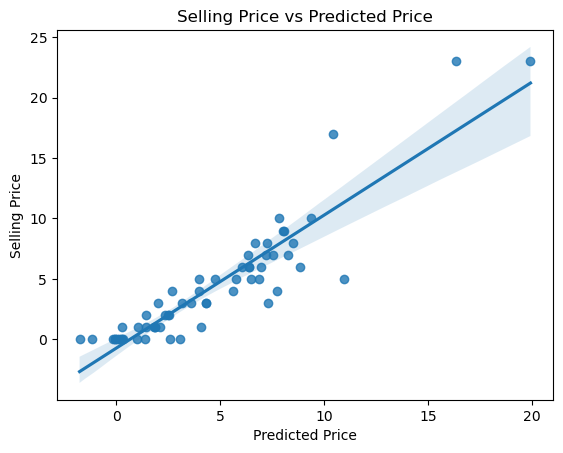

In [26]:
sns.regplot(x = pred,y  = Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Predicted Price")
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
print("Mean Absolute Error: ",mean_absolute_error(pred,Y_test))
print("Mean Squared Error:  ",mean_squared_error(pred,Y_test))
print("R2 Score:            ",r2_score(pred,Y_test))

Mean Absolute Error:  1.3058828221051744
Mean Squared Error:   3.944607868955614
R2 Score:             0.75949164571922
